In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [38]:
# Gather all filenames in provided directory
directory = "weather_data"
filenames = [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]
print(filenames)

['pressure.csv', 'wind_speed.csv', 'city_attributes.csv', 'humidity.csv', 'wind_direction.csv', 'weather_description.csv', 'temperature.csv']


In [39]:
# Create dataframe containing the Hour, Day, Month, and Year of all entries
df = pd.read_csv(os.path.join(directory, 'humidity.csv'))
df = pd.to_datetime(df['datetime'])
datetime_df = pd.DataFrame()
datetime_df['Hour'] = df.dt.hour
datetime_df['Day'] = df.dt.day
datetime_df['Month'] = df.dt.month
datetime_df['Year'] = df.dt.year
print(datetime_df)

       Hour  Day  Month  Year
0        12    1     10  2012
1        13    1     10  2012
2        14    1     10  2012
3        15    1     10  2012
4        16    1     10  2012
...     ...  ...    ...   ...
45248    20   29     11  2017
45249    21   29     11  2017
45250    22   29     11  2017
45251    23   29     11  2017
45252     0   30     11  2017

[45253 rows x 4 columns]


In [40]:
# Gather a dataframe for each csv file
all_feature_dfs = []
lat_long_df = pd.DataFrame()
for file in filenames:
    df = pd.read_csv(os.path.join(directory, file))
    if file != 'city_attributes.csv':
        df = df.drop(columns=['datetime', 'Beersheba', 'Tel Aviv District', 'Eilat', 'Haifa', 'Nahariyya', 'Jerusalem'])
        all_feature_dfs.append((file[:len(file) - 4], df))
    else:
        df = df.drop(columns=['City', 'Country'])
        lat_long_df = df
    print(file)
    print(df)

pressure.csv
       Vancouver  Portland  San Francisco  Seattle  Los Angeles  San Diego  \
0            NaN       NaN            NaN      NaN          NaN        NaN   
1            NaN    1024.0         1009.0   1027.0       1013.0     1013.0   
2            NaN    1024.0         1009.0   1027.0       1013.0     1013.0   
3            NaN    1024.0         1009.0   1028.0       1013.0     1013.0   
4            NaN    1024.0         1009.0   1028.0       1013.0     1013.0   
...          ...       ...            ...      ...          ...        ...   
45248        NaN    1031.0            NaN   1030.0       1016.0     1017.0   
45249        NaN    1030.0            NaN   1030.0       1016.0     1017.0   
45250        NaN    1030.0            NaN   1029.0       1015.0     1016.0   
45251        NaN    1029.0            NaN   1028.0       1016.0     1016.0   
45252        NaN    1029.0            NaN   1028.0       1015.0     1017.0   

       Las Vegas  Phoenix  Albuquerque  Denver  ..

In [41]:
# Combine all features into a dataframe for each city
all_city_dfs = []
for city_idx in range(30):
    city_df = datetime_df.copy()
    for feature, df in all_feature_dfs:
        city_df[feature] = df.iloc[:, city_idx]
    city_name = df.columns[city_idx]
    city_df['Latitude'] = lat_long_df.iloc[city_idx, 0]
    city_df['Longitude'] = lat_long_df.iloc[city_idx, 1]
    print(city_name)
    print(city_df)
    all_city_dfs.append(city_df)

Vancouver
       Hour  Day  Month  Year  pressure  wind_speed  humidity  wind_direction  \
0        12    1     10  2012       NaN         NaN       NaN             NaN   
1        13    1     10  2012       NaN         0.0      76.0             0.0   
2        14    1     10  2012       NaN         0.0      76.0             6.0   
3        15    1     10  2012       NaN         0.0      76.0            20.0   
4        16    1     10  2012       NaN         0.0      77.0            34.0   
...     ...  ...    ...   ...       ...         ...       ...             ...   
45248    20   29     11  2017       NaN         NaN       NaN             NaN   
45249    21   29     11  2017       NaN         NaN       NaN             NaN   
45250    22   29     11  2017       NaN         NaN       NaN             NaN   
45251    23   29     11  2017       NaN         NaN       NaN             NaN   
45252     0   30     11  2017       NaN         NaN       NaN             NaN   

      weather_des

In [42]:
# Combine all city dataframes into a single master dataframe
master_df = pd.concat(all_city_dfs, axis=0)
master_df = master_df.reset_index(drop=True)
print(master_df)

         Hour  Day  Month  Year  pressure  wind_speed  humidity  \
0          12    1     10  2012       NaN         NaN       NaN   
1          13    1     10  2012       NaN         0.0      76.0   
2          14    1     10  2012       NaN         0.0      76.0   
3          15    1     10  2012       NaN         0.0      76.0   
4          16    1     10  2012       NaN         0.0      77.0   
...       ...  ...    ...   ...       ...         ...       ...   
1357585    20   29     11  2017    1017.0         8.0      37.0   
1357586    21   29     11  2017    1019.0         6.0      74.0   
1357587    22   29     11  2017    1019.0         7.0      74.0   
1357588    23   29     11  2017    1022.0         2.0      56.0   
1357589     0   30     11  2017    1023.0         2.0      56.0   

         wind_direction weather_description  temperature   Latitude  \
0                   NaN                 NaN          NaN  49.249660   
1                   0.0                mist   284.630

In [43]:
# Drop all rows that have at least one NaN value
preprocess_df = master_df.dropna()
preprocess_df = preprocess_df.reset_index(drop=True)
print(preprocess_df)

         Hour  Day  Month  Year  pressure  wind_speed  humidity  \
0           9    2     10  2012     807.0         0.0      87.0   
1          10    2     10  2012     849.0         0.0      88.0   
2          11    2     10  2012     890.0         0.0      89.0   
3          12    2     10  2012     932.0         0.0      89.0   
4          13    2     10  2012     973.0         0.0      90.0   
...       ...  ...    ...   ...       ...         ...       ...   
1330433    20   29     11  2017    1017.0         8.0      37.0   
1330434    21   29     11  2017    1019.0         6.0      74.0   
1330435    22   29     11  2017    1019.0         7.0      74.0   
1330436    23   29     11  2017    1022.0         2.0      56.0   
1330437     0   30     11  2017    1023.0         2.0      56.0   

         wind_direction weather_description  temperature   Latitude  \
0                 268.0       broken clouds   284.590217  49.249660   
1                 281.0       broken clouds   284.588

                    weather_description   count
0                          sky is clear  475715
1                         broken clouds  151804
2                       overcast clouds  123817
3                      scattered clouds  118571
4                            light rain  114905
5                            few clouds  103097
6                                  mist   97460
7                         moderate rain   40095
8                                  haze   23236
9                                   fog   16080
10                           light snow   14368
11                 heavy intensity rain   13396
12              light intensity drizzle    8047
13               proximity thunderstorm    5272
14          light intensity shower rain    3632
15                                 snow    3152
16                         thunderstorm    3027
17                              drizzle    2420
18                           heavy snow    2378
19                proximity shower rain 

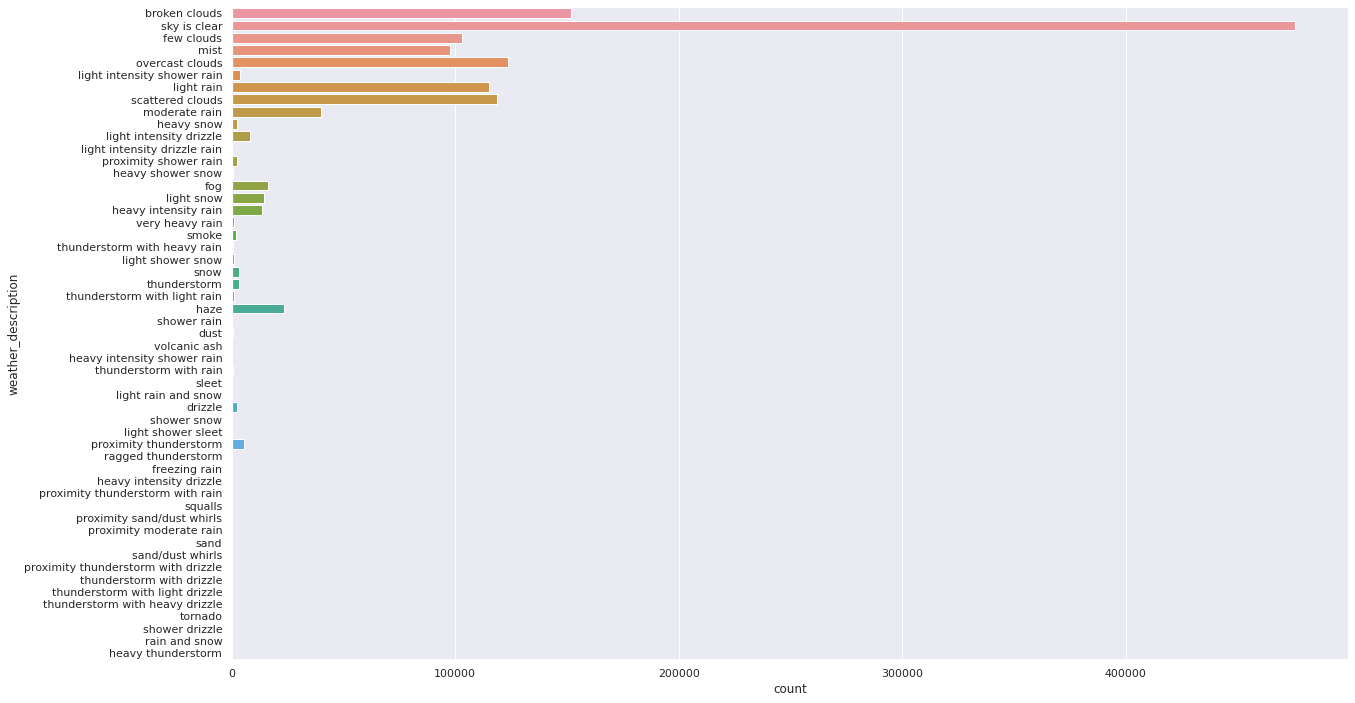

In [44]:
# Display how skewed the output label (weather_description) counts are
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,12))
ax = sns.countplot(y="weather_description", data=preprocess_df)
counts = Counter(preprocess_df["weather_description"]).most_common()
skew = pd.DataFrame()
skew['weather_description'] = [descr for descr, count in counts]
skew['count'] = [count for descr, count in counts]
print(skew)

     weather_description   count
0           sky is clear  475715
1          broken clouds  151804
2        overcast clouds  123817
3       scattered clouds  118571
4             light rain  114905
5             few clouds  103097
6                   mist   97460
7          moderate rain   40095
8                   haze   23236
9                    fog   16080
10            light snow   14368
11  heavy intensity rain   13396


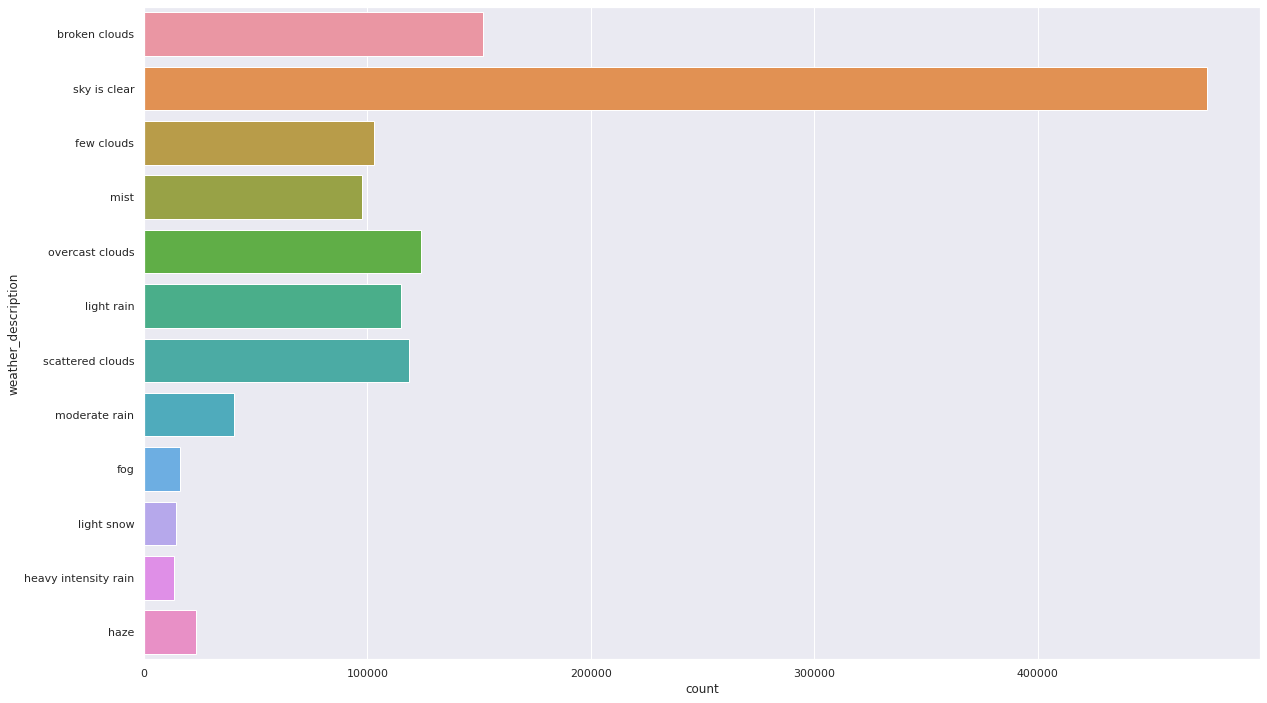

In [45]:
# Remove all weather conditions that have less than 10,000 data points, to help balance the output labels
minority_conditions = skew[skew['count'] < 10000]
preprocess_df = preprocess_df[~preprocess_df['weather_description'].isin(minority_conditions['weather_description'])]
sns.set_theme(style="darkgrid")
plt.figure(figsize = (20,12))
ax2 = sns.countplot(y="weather_description", data=preprocess_df)
counts = Counter(preprocess_df["weather_description"]).most_common()
skew = pd.DataFrame()
skew['weather_description'] = [descr for descr, count in counts]
skew['count'] = [count for descr, count in counts]
print(skew)

In [46]:
# Encode weather description labels to integers
labels, levels = pd.factorize(preprocess_df['weather_description'])
preprocess_df['weather_description'] = labels
print(preprocess_df)

         Hour  Day  Month  Year  pressure  wind_speed  humidity  \
0           9    2     10  2012     807.0         0.0      87.0   
1          10    2     10  2012     849.0         0.0      88.0   
2          11    2     10  2012     890.0         0.0      89.0   
3          12    2     10  2012     932.0         0.0      89.0   
4          13    2     10  2012     973.0         0.0      90.0   
...       ...  ...    ...   ...       ...         ...       ...   
1330433    20   29     11  2017    1017.0         8.0      37.0   
1330434    21   29     11  2017    1019.0         6.0      74.0   
1330435    22   29     11  2017    1019.0         7.0      74.0   
1330436    23   29     11  2017    1022.0         2.0      56.0   
1330437     0   30     11  2017    1023.0         2.0      56.0   

         wind_direction  weather_description  temperature   Latitude  \
0                 268.0                    0   284.590217  49.249660   
1                 281.0                    0   284.

In [47]:
# Save to a csv file
preprocess_df.to_csv('all_weather_data.csv', index=False)